# Exercise: The Price of Weed

#### Summary

Find out how marijuana prices change over time and place in the United States

#### Data Source(s)

Data scraped from http://www.priceofweed.com/, GitHub repository at, https://github.com/frankbi/price-of-weed

Marijuana laws by state from https://data.world/sya/marijuana-laws-by-state

#### Files

- Lots of csvs in data/, formatted at DDMMYYY.csv, daily prices for different states
- `state_marijuana_laws_10_2016.csv`, marijuana laws by state

#### Data dictionary

- **State** the state name
- **HighQ** high quality marijuana, price per ounce
- **HighQN** high quality marijuana, sample size 
- **MedQ** medium quality marijuana, price per ounce
- **MedQN** medium quality marijuana, sample size
- **LowQ** low quality marijuana, price per ounce
- **LowQN** low quality marijuana, sample size

#### Skills

- Reading in many many files
- Combining multiple dataframes
- Cleaning up columns
- Customizing matplotlib graphs

# Read in `data/weedprices01012015.csv`

In [1]:
import pandas as pd


In [2]:
%matplotlib inline

In [3]:
df_01012015 = pd.read_csv("data/weedprices01012015.csv", error_bad_lines=False)
df_01012015.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37
2,Arizona,298.51,2638,209.43,2426,I feel bad for these guys -->,306
3,Arkansas,341.68,846,207.20,836,I feel bad for these guys -->,145
4,California,243.96,16512,189.35,19151,I feel bad for these guys -->,1096


## Cleaning things up

I have no idea what the whole "I feel bad for these guys" means, but *it certainly isn't good data*. It should probably be NaN instead: I'll let you decide how you're going to fix that one.

In [4]:
import numpy as np
np.nan
df_01012015['LowQ'].replace('I feel bad for these guys -->', np.nan, inplace = True)
df_01012015.head()


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.24,1463,NaN,182
1,Alaska,303.02,350,270.45,475,NaN,37
2,Arizona,298.51,2638,209.43,2426,NaN,306
3,Arkansas,341.68,846,207.20,836,NaN,145
4,California,243.96,16512,189.35,19151,NaN,1096


## Graph the top 10 least expensive states for high quality marijuana

In [5]:
df_01012015.sort_values('HighQ', ascending=True).head(10)


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
31,Oregon,205.80,2179,180.90,2018,NaN,95
47,Washington,233.01,3341,189.92,3564,NaN,160
5,Colorado,243.72,3148,195.11,2877,NaN,178
4,California,243.96,16512,189.35,19151,NaN,1096
20,Montana,265.51,738,241.42,364,NaN,32
22,Nevada,266.14,1237,226.59,1431,NaN,78
12,Idaho,275.37,450,245.14,672,NaN,35
34,Michigan,288.06,3990,270.77,3728,NaN,295
25,New Mexico,289.04,800,219.28,665,NaN,68
44,Utah,290.42,959,238.08,1055,NaN,62


## Graph the top 5 least expensive and the top 5 most expensive states for high quality marijuana, in one graph

You'll probably need to make a new dataframe out of the first 5 and last 5.

In [6]:
import matplotlib.pyplot as plt


In [7]:
df_01012015_bot5 = df_01012015.sort_values('HighQ', ascending=True ).head(5)
df_01012015_top5 = df_01012015.sort_values('HighQ', ascending=False).head(5)

df_01012015_top5bot5 = pd.concat([df_01012015_bot5,df_01012015_top5], ignore_index=True)
df_01012015_top5bot5


,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Oregon,205.80,2179,180.90,2018,NaN,95
1,Washington,233.01,3341,189.92,3564,NaN,160
2,Colorado,243.72,3148,195.11,2877,NaN,178
3,California,243.96,16512,189.35,19151,NaN,1096
4,Montana,265.51,738,241.42,364,NaN,32
5,North Dakota,393.94,213,339.60,327,NaN,23
6,Vermont,371.23,357,308.86,367,NaN,32
7,Maryland,366.01,2863,255.84,2463,NaN,193
8,Virginia,364.95,3514,293.02,3085,NaN,285
9,Iowa,364.92,975,289.05,1045,NaN,122


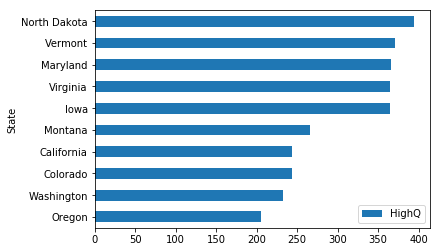

In [8]:
ax = df_01012015_top5bot5.sort_values('HighQ', ascending=True).plot(x='State', y='HighQ', kind='barh')


## Now go back and make one of those graphs look nice!

- Add a title
- Add a label to the bottom axis
- Remove the label on the left axis
- Remove the legend
- Get rid of the boxes around everything
- Remove most of the tick marks
- Add dollar signs for the bottom

For tips, just ask me and/or use

- https://matplotlib.org/gallery.html
- Especially https://matplotlib.org/examples/ticks_and_spines/spines_demo.html

To format numbers, you can use something that might look a little familiar

```python
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))
```

In [9]:
import matplotlib.ticker as ticker
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("${x:,.0f}"))


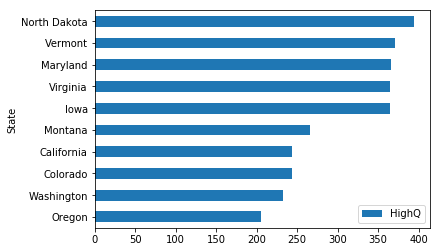

In [10]:
ax = df_01012015_top5bot5.sort_values('HighQ', ascending=True).plot(x='State', y='HighQ', kind='barh') #style
ax.spines.keys() # odict_keys(['left', 'right', 'bottom', 'top'])
ax.spines['left']


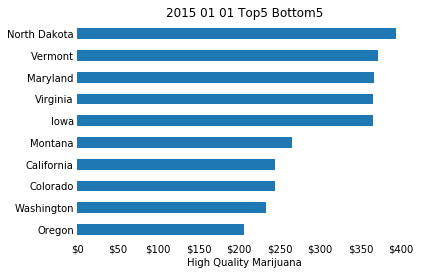

In [11]:
ax = df_01012015_top5bot5.sort_values('HighQ', ascending=True).plot(x='State', y='HighQ', kind='barh')

# Add a title
ax.set_title ('2015 01 01 Top5 Bottom5')

# Add a label to the bottom axis
ax.set_xlabel ("High Quality Marijuana")

# Remove the label on the left axis
ax.set_ylabel ("")

# Remove the legend
ax.legend_.set_visible(False)

# Get rid of the boxes around everything
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Remove most of the tick marks
ax.tick_params(length=0)

# Add dollar signs for the bottom
import matplotlib.ticker as mtick # https://stackoverflow.com/questions/25750170/can-i-show-decimal-places-and-scientific-notation-on-the-axis-of-a-matplotlib-pl 
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick) 


# Reading in many many files

## Finding the filenames

Make a list of the filenames of every single CSV files inside of the `data` directory. Don't type them out.

If you do this correctly you will have a list of **491** filenames.

In [12]:
import glob
filenames = glob.glob("data/*.csv")
len(filenames)

491

## Turn them into dataframes

Read each of them in, converting them to a **list of dataframes**. Save as `price_dfs`.

- Tip: List comprehensions would be good here

In [13]:
price_dfs = [pd.read_csv(filename) for filename in filenames]
len(price_dfs) # 491 # list of dataset


491

## Examing the results

Look at the first 2 rows of the first dataframe.

Look at the first 2 rows of the last dataframe.

**If we combined them, could we tell them apart?**

In [14]:
price_dfs[0].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,$339.06,1042,$198.64,933,$149.49,123
1,Alaska,$288.75,252,$260.6,297,$388.58,26


In [15]:
price_dfs[-1].head(2)

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN
0,Alabama,337.54,1539,208.15,1460,I feel bad for these guys -->,182
1,Alaska,303.02,350,270.45,475,I feel bad for these guys -->,37


## Making them identifiable

Each dataframe needs to have a column thats says the date. Or, actually... let's just save the filename as a column.

You **could** do it like this.

```python
# Take the first dataframe, which was made from the first filename
# Create a new 'filename' column using the first filename
price_dfs[0]['filename'] = filenames[0]
# Take the second dataframe, which was made from the second filename
# Create a new 'filename' column using the second filename
price_dfs[1]['filename'] = filenames[1]
# Take the third dataframe, which was made from the third filename
# Create a new 'filename' column using the third filename
price_dfs[2]['filename'] = filenames[2]
```

But that way is **not any fun**, and would take too long. I have a faster way.

In [16]:
for filename, dataframe in zip(filenames, price_dfs) :
    print("Looking at data", filename)
    dataframe['filename'] = filename

Looking at data data/weedprices01012014.csv
Looking at data data/weedprices01012015.csv
Looking at data data/weedprices01022014.csv
Looking at data data/weedprices01022015.csv
Looking at data data/weedprices01032014.csv
Looking at data data/weedprices01042014.csv
Looking at data data/weedprices01052014.csv
Looking at data data/weedprices01062014.csv
Looking at data data/weedprices01062015.csv
Looking at data data/weedprices01072014.csv
Looking at data data/weedprices01072015.csv
Looking at data data/weedprices01082014.csv
Looking at data data/weedprices01092014.csv
Looking at data data/weedprices01102014.csv
Looking at data data/weedprices01112014.csv
Looking at data data/weedprices01122014.csv
Looking at data data/weedprices02012014.csv
Looking at data data/weedprices02012015.csv
Looking at data data/weedprices02022014.csv
Looking at data data/weedprices02022015.csv
Looking at data data/weedprices02032014.csv
Looking at data data/weedprices02042014.csv
Looking at data data/weedprices0

Looking at data data/weedprices14052014.csv
Looking at data data/weedprices14052015.csv
Looking at data data/weedprices14062014.csv
Looking at data data/weedprices14062015.csv
Looking at data data/weedprices14072014.csv
Looking at data data/weedprices14072015.csv
Looking at data data/weedprices14082014.csv
Looking at data data/weedprices14092014.csv
Looking at data data/weedprices14102014.csv
Looking at data data/weedprices14112014.csv
Looking at data data/weedprices14122014.csv
Looking at data data/weedprices15012014.csv
Looking at data data/weedprices15012015.csv
Looking at data data/weedprices15022014.csv
Looking at data data/weedprices15022015.csv
Looking at data data/weedprices15032014.csv
Looking at data data/weedprices15042014.csv
Looking at data data/weedprices15052014.csv
Looking at data data/weedprices15052015.csv
Looking at data data/weedprices15062014.csv
Looking at data data/weedprices15062015.csv
Looking at data data/weedprices15072014.csv
Looking at data data/weedprices1

## Combine all 491 dataframes into one dataframe

Confirm it has **24990 rows and 8 columns.**

In [17]:
df_all = pd.concat(price_dfs, ignore_index=True)

In [18]:
df_all.shape

(24990, 8)

In [19]:
# df_all

## Pull out the day, month and year from each filename

Do **not** store it back yet!

Warning message:  
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)  
  """Entry point for launching an IPython kernel.

In [20]:
df_day = df_all.filename.str.extract(r"weedprices(\d\d)\d\d\d\d\d\d", expand=False)
# df_day

In [21]:
df_month = df_all.filename.str.extract(r"weedprices\d\d(\d\d)\d\d\d\d", expand=False)
# df_month

In [22]:
df_year = df_all.filename.str.extract(r"weedprices\d\d\d\d(\d\d\d\d)", expand=False)
# df_year

## Okay, now add all three columns back at once

You should rename the columns first!

In [23]:
df_all['Day'] = df_day
df_all['Month'] = df_month
df_all['Year'] = df_year
df_all

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,filename,Day,Month,Year
0,Alabama,$339.06,1042,$198.64,933,$149.49,123,data/weedprices01012014.csv,01,01,2014
1,Alaska,$288.75,252,$260.6,297,$388.58,26,data/weedprices01012014.csv,01,01,2014
2,Arizona,$303.31,1941,$209.35,1625,$189.45,222,data/weedprices01012014.csv,01,01,2014
3,Arkansas,$361.85,576,$185.62,544,$125.87,112,data/weedprices01012014.csv,01,01,2014
4,California,$248.78,12096,$193.56,12812,$192.92,778,data/weedprices01012014.csv,01,01,2014
5,Colorado,$236.31,2161,$195.29,1728,$213.5,128,data/weedprices01012014.csv,01,01,2014
6,Connecticut,$347.9,1294,$273.97,1316,$257.36,91,data/weedprices01012014.csv,01,01,2014
7,Delaware,$373.18,347,$226.25,273,$199.88,34,data/weedprices01012014.csv,01,01,2014
8,District of Columbia,$352.26,433,$295.67,349,$213.72,39,data/weedprices01012014.csv,01,01,2014
9,Florida,$306.43,6506,$220.03,5237,$158.26,514,data/weedprices01012014.csv,01,01,2014


## Plot the change in marijuana prices in Oregon over time

In [24]:
import re
def to_float(value):
    if isinstance(value, float):
        if np.isnan(value):
            return np.nan
        else :
            return value
    else:
        m = re.search(r'\$(.*)', value)
        return float(m.group(1))
        
value = '$355.9'
print(to_float(value)) # 355.9

value = np.nan
print(to_float(value)) # np.nan

355.9
nan


In [25]:
# df_all['HighQ'].astype(float)
df_all['HighQ'] = df_all['HighQ'].apply(to_float)

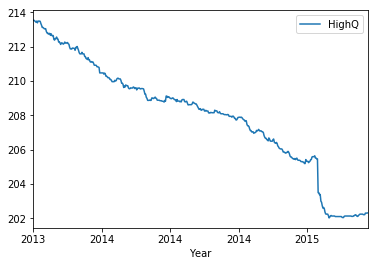

In [26]:
df_all[df_all['State'] == 'Oregon'].sort_values(['Year','Month','Day'], ascending=True).plot(x='Year', y='HighQ')


## Plot the change in marijuana prices in all states over time

In [27]:
# df_all[df_all['State'] == 'Oregon'].sort_values(['Year','Month','Day'], ascending=True).plot(x='Year', y='HighQ',figsize=(20,10),color='green')
# df_all[df_all['State'] == 'Alabama'].sort_values(['Year','Month','Day'], ascending=True).plot(x='Year', y='HighQ',figsize=(20,10),color='blue')



In [28]:
df_redate = df_all.copy()
df_redate["datetime"] = pd.to_datetime(df_all['Year'] + df_all['Month'] + df_all['Day'], format='%Y%m%d')
df_redate = df_redate[['State','HighQ','datetime']]
# df_redate

In [29]:
# df_redate.groupby('State').plot(x='datetime', y='HighQ',figsize=(20,10))

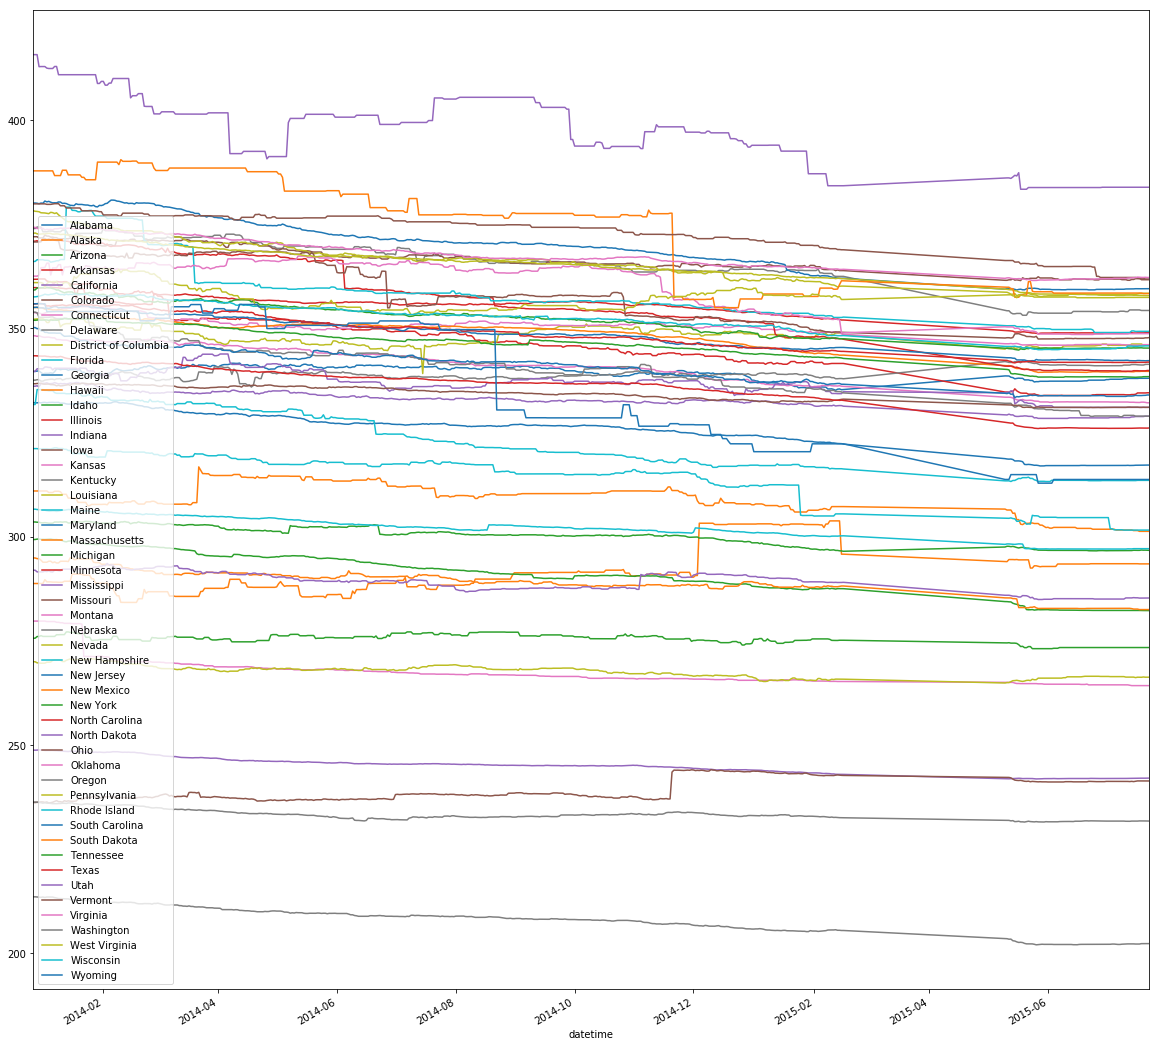

In [31]:
fig, ax = plt.subplots()
labels = []
for key,group in df_redate.groupby(['State']):
    ax = group.plot(ax=ax, kind='line',x='datetime',y='HighQ',figsize=(20,20))
    labels.append(key)
lines, _ = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()
